# Setting

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/train_data.csv')

In [3]:
list_title = list(df['title'])
list_label = list(df['topic_idx'])

In [4]:
!pip install -q requests folium
!pip install -q translators
!pip install -q imbalanced-learn

     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 6.4 MB 11.3 MB/s 
     |████████████████████████████████| 76 kB 5.2 MB/s 
     |████████████████████████████████| 58 kB 5.7 MB/s 
     |████████████████████████████████| 52 kB 1.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [13]:
import tensorflow as tf
import os

In [14]:
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.54.104.98:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.54.104.98:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


In [15]:
strategy = tf.distribute.TPUStrategy(resolver)

INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [16]:
!pip install transformers
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 5.0 MB/s 
     |████████████████████████████████| 86 kB 5.1 MB/s 
     |████████████████████████████████| 596 kB 71.6 MB/s 
     |████████████████████████████████| 6.6 MB 46.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 5.4 MB/s 


In [5]:
from tqdm.notebook import tqdm

In [6]:
import time

# Translators Papago

In [7]:
import translators as ts
papago = ts.papago

Using United States server backend.


In [20]:
papago_dict = {
    'title':[],
    'topic_idx':list_label[:50],
    'time':[]
}

for txt in tqdm(list_title[:50]):
  t0 = time.time()
  ko2en = papago(txt, from_language='ko', to_language='ja')
  result = papago(ko2en, from_language='ja', to_language='ko')
  t1 = time.time()
  papago_dict['title'].append(result)
  papago_dict['time'].append(t1-t0)

  0%|          | 0/50 [00:00<?, ?it/s]

In [21]:
df_papago = pd.DataFrame(papago_dict)
df_papago.head()

,title,topic_idx,time
0,인천→핀란드 항공기 결항 휴가철 여행객 분노,4,3.794105
1,"실리콘밸리 넘어 구글, 15조원 들여 미 전역 거점화",4,3.630031
2,이란 외무의 긴장완화 해법은 미국이 경제전쟁을 멈추는 것.,4,2.416946
3,NYT클린턴 측근들 한국기업 특수관계 조명 공사 맞물려 종합,4,2.951661
4,"시진핑 트럼프, 중미 무역협상 조속 타결 희망",4,2.899556


# Translators Bing

In [10]:
import translators as ts
bing = ts.bing

In [22]:
bing_dict = {
    'title':[],
    'topic_idx':list_label[:50],
    'time':[]
}

for txt in tqdm(list_title[:50]):
  t0 = time.time()
  ko2en = bing(txt, from_language='ko', to_language='ja')
  result = bing(ko2en, from_language='ja', to_language='ko')
  t1 = time.time()
  bing_dict['title'].append(result)
  bing_dict['time'].append(t1-t0)

  0%|          | 0/50 [00:00<?, ?it/s]

In [23]:
df_bing = pd.DataFrame(bing_dict)
df_bing.head()

,title,topic_idx,time
0,인천→ 핀란드 항공기 취소 ... 휴가 여행자는 광란에 빠져 있습니다.,4,1.537274
1,실리콘 밸리 너머... 구글은 세계에서 거대 점화에 15 조 원을 지출,4,2.219367
2,이란의 대외 긴장을 완화하기 위한 해결책은 미국이 경제 전쟁을 중단하는 것이다.,4,2.198806
3,NYT 클린턴 보좌관은 회사의 특별한 관계를 조명합니다 ... 수업과 사분면,4,2.669575
4,시진핑 주석은 트럼프가 미·중 무역협상을 조기에 끝내기를 원한다.,4,2.374215


MBart-Large_50

In [17]:
from transformers import MBart50TokenizerFast, MBartForConditionalGeneration

tokenizer = MBart50TokenizerFast.from_pretrained("facebook/mbart-large-50-many-to-many-mmt")

def create_model():

  model = MBartForConditionalGeneration.from_pretrained("facebook/mbart-large-50-many-to-many-mmt")

  return model

Downloading:   0%|          | 0.00/529 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/649 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

In [18]:
with strategy.scope():
  model = create_model()

Downloading:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

In [24]:
from tqdm.notebook import tqdm

mbart_dict = {'title':[],
          'topic_idx':list_label[:50],
          'time':[]}

for title in tqdm(list_title[:50]):

  t0 = time.time()
  tokenizer.src_lang = "ko_KR"

  inputs = tokenizer(title, return_tensors="pt")
  translated_tokens = model.generate(**inputs, forced_bos_token_id=tokenizer.lang_code_to_id["ja_XX"])
  translate_en = tokenizer.batch_decode(translated_tokens, skip_special_tokens=True)[0]

  tokenizer.src_lang = "ja_XX"

  inputs = tokenizer(translate_en, return_tensors="pt")
  translated_tokens = model.generate(**inputs, forced_bos_token_id=tokenizer.lang_code_to_id["ko_KR"])
  translate_kr = tokenizer.batch_decode(translated_tokens, skip_special_tokens=True)[0]
  t1 = time.time()
  mbart_dict['title'].append(translate_kr)
  mbart_dict['time'].append(t1-t0)

  0%|          | 0/50 [00:00<?, ?it/s]

In [25]:
df_MBart = pd.DataFrame(mbart_dict)
df_MBart.head()

,title,topic_idx,time
0,Singapore to Finland.,4,11.429223
1,Silicon Valley를 넘어서 Google 15억 달러의 세계화입니다.,4,19.058452
2,이란의外交政策의 해결책은 미국이 경제 전쟁을 끝내야 한다는 것입니다.,4,18.241916
3,NEW YORK : korea 기업의 특별한 관계를 보여줍니다.,4,19.904936
4,시린푸르프: 중미貿易협정의 타협을 원합니다.,4,22.293981


# M2M100

In [26]:
from transformers import M2M100ForConditionalGeneration, M2M100Tokenizer

tokenizer = M2M100Tokenizer.from_pretrained("facebook/m2m100_418M")

def create_model():

  model = M2M100ForConditionalGeneration.from_pretrained("facebook/m2m100_418M")

  return model

Downloading:   0%|          | 0.00/3.54M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.31M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/272 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.11k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/908 [00:00<?, ?B/s]

In [27]:
with strategy.scope():
  model = create_model()

Downloading:   0%|          | 0.00/1.80G [00:00<?, ?B/s]

In [35]:
# title = "이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것"
from tqdm.notebook import tqdm

m2m_dict = {'title':[],
           'topic_idx':list_label[:50],
            'time':[]}

for title in tqdm(list_title[:50]):

  t0 = time.time()
  tokenizer.src_lang = "ko"
  encoded_ko = tokenizer(title, return_tensors="pt")
  generated_tokens = model.generate(**encoded_ko, forced_bos_token_id=tokenizer.get_lang_id("ja"))
  result = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)[0]

  tokenizer.src_lang = "ja"
  encoded_ko = tokenizer(result, return_tensors="pt")
  generated_tokens = model.generate(**encoded_ko, forced_bos_token_id=tokenizer.get_lang_id("ko"))
  result = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)[0]
  t1 = time.time()

  m2m_dict['title'].append(result)
  m2m_dict['time'].append(t1-t0)

  0%|          | 0/50 [00:00<?, ?it/s]

In [36]:
print(len(m2m_dict['title']))
print(len(m2m_dict['topic_idx']))
print(len(m2m_dict['time']))

50
50
50


In [37]:
df_m2m = pd.DataFrame(m2m_dict)
df_m2m.head()

,title,topic_idx,time
0,"인디언, 핀란드 항공기 종료...휴가 여행자 분할",4,16.910570
1,실리콘 밸리를 넘어서 구글은 15달러에 달한다.,4,13.211989
2,이란의 긴장 해결 방법은 미국이 경제 전쟁을 멈추게 할 것입니다.,4,13.409171
3,NYT 클린턴 측 한국 기업 특별 관계 조명...볼과 사우스 대결,4,13.205178
4,시진핑 트럼프와의 중앙미국 무역 협상이 급속히 끝났다.,4,14.271695


# 성능 비교

### 정확도

In [96]:
from collections import Counter
import numpy as np
from nltk import ngrams
import nltk.translate.bleu_score as bleu

In [73]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 453 kB 63.0 MB/s 


In [77]:
from konlpy.tag import Okt
tokenizer = Okt()

In [74]:
orgin = list(df['title'])
list_p = list(df_papago['title'])
list_b = list(df_bing['title'])
list_mb = list(df_MBart['title'])
list_m2m = list(df_m2m['title'])

In [132]:
list_orgin = []
b_papago = []
b_bing = []
b_mbart = []
b_m2m = []

seq_list = [orgin[:50], list_p, list_b, list_mb, list_m2m]

for seq in seq_list:
  
  if seq == orgin[:50]:

    for i in tqdm(seq):
      word = tokenizer.morphs(i, stem=False)
      list_orgin.append(word)
  
  elif seq == list_p:
    for i in tqdm(seq):
      word = tokenizer.morphs(i, stem=False)
      b_papago.append(word)

  elif seq == list_b:
    for i in tqdm(seq):
      word = tokenizer.morphs(i, stem=False)
      b_bing.append(word)

  elif seq == list_mb:
    for i in tqdm(seq):
      word = tokenizer.morphs(i, stem=False)
      b_mbart.append(word)

  elif seq == list_m2m:
    for i in tqdm(seq):
      word = tokenizer.morphs(i, stem=False)
      b_m2m.append(word)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [134]:
bleu_list = [b_papago, b_bing, b_mbart, b_m2m]
score = []

for method in bleu_list:
  bleu_score = 0
  for ref, pred in zip(list_orgin, method):
      if len(ref) == 0 or len(pred) == 0:
          continue
      bleu_score += bleu.sentence_bleu(ref, pred)

  bleu_score = bleu_score/len(list_orgin)
  score.append(bleu_score)

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


In [138]:
print(f'Papago Bleu Score : {score[0]}')
print(f'Bing Bleu Score : {score[1]}')
print(f'MBart Bleu Score : {score[2]}')
print(f'M2M100 Bleu Score : {score[3]}')

Papago Bleu Score : 0.5054659949791751
Bing Bleu Score : 0.4675862991306046
MBart Bleu Score : 0.3448986332269976
M2M100 Bleu Score : 0.43088205718229466


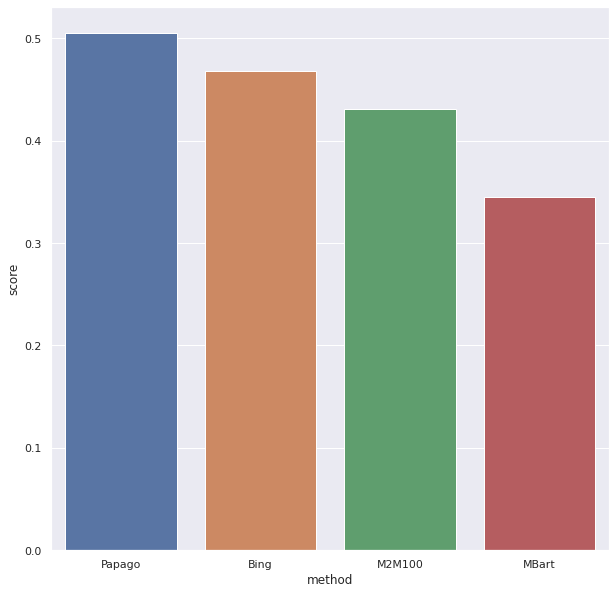

In [148]:
df_bleu = pd.DataFrame({'method':['Papago', 'Bing', 'MBart', 'M2M100'],
                        'score':score})

order = list(df_bleu.sort_values(by='score', ascending=False)['method'])


fig = plt.figure(figsize=(10,10))
sns.barplot(data=df_bleu, x='method', y='score', order=order)

### 시각화

In [38]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

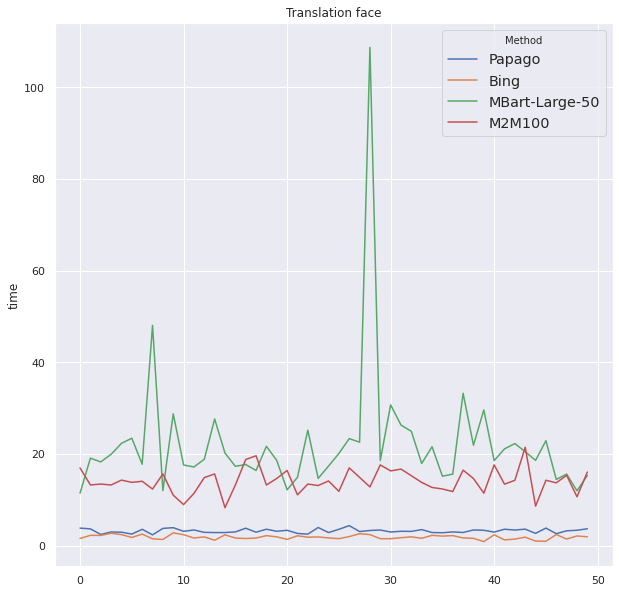

In [52]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1, 1, 1)

sns.lineplot(data=df_papago,x=df_papago.index, y='time')
sns.lineplot(data=df_bing,x=df_bing.index, y='time')
sns.lineplot(data=df_MBart,x=df_MBart.index, y='time')
sns.lineplot(data=df_m2m,x=df_m2m.index, y='time')


plt.title('Translation face')

plt.legend(labels=['Papago','Bing', 'MBart-Large-50', 'M2M100'],
           fontsize='large',
           title='Method',
           title_fontsize='10')

In [54]:
papago_total_time = sum(list(df_papago['time']))
bing_total_time = sum(list(df_bing['time']))
mbart_total_time = sum(list(df_MBart['time']))
m2m_total_time = sum(list(df_m2m['time']))

In [55]:
df_total_time = pd.DataFrame({'method':['Papago','Bing', 'MBart-Large-50', 'M2M100'],
                              'total_time':[papago_total_time, bing_total_time, mbart_total_time, m2m_total_time]})

In [71]:
order = list(df_total_time.sort_values(by='total_time', ascending=False)['method'])

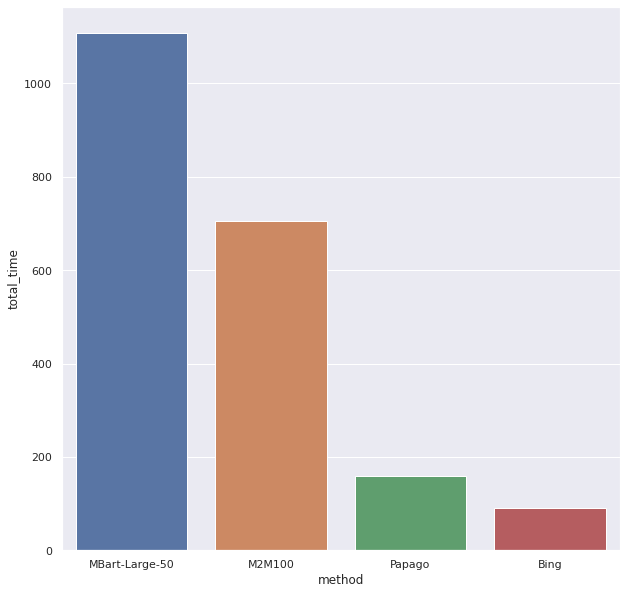

In [72]:
fig = plt.figure(figsize=(10,10))
sns.barplot(data=df_total_time, x='method', y='total_time', order=order)